In [1]:
# Importing necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

/opt/miniconda3/envs/NLP_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#!pip install scipy

# Import libraries
import scipy.io.arff as arff
import pandas as pd
import numpy as np

# Load the ARFF file
data, meta = arff.loadarff('OVA_Lung.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Convert byte strings to regular strings (if needed)
string_columns = df.select_dtypes([object]).columns
for col in string_columns:
    df[col] = df[col].str.decode('utf-8')

# Handle any missing values
df = df.replace('?', np.nan)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (1545, 10937)

First few rows:
     ID_REF  1007_s_at  121_at  1405_i_at  1438_at  1494_f_at  1552256_a_at  \
0   53035.0     2230.1  1144.3     1180.6    207.0      333.2        1264.1   
1  137989.0     3466.5   940.8     2326.2    401.6      158.2        1378.3   
2  179950.0     6174.0   763.1      317.4    460.9     7944.4        1298.8   
3  117692.0     3128.7   971.1     1973.3    457.3      274.1        1894.9   
4  179915.0     2646.3  1736.3      850.3    153.9      310.8        3477.2   

   1552257_a_at  1552309_a_at  1552348_at  ...  AFFX-r2-Ec-bioC-3_at  \
0        1297.1         567.1       206.4  ...                5854.8   
1        1945.1         275.6       466.8  ...                7263.4   
2        1874.0         302.1        17.4  ...                6241.8   
3        1323.5         362.7       348.2  ...               10233.1   
4         732.9         400.6        33.5  ...                8747.0   

   AFFX-r2-Ec-bioC-5_at  AFFX-r2-Ec-bioD-3_at 

In [3]:
df.shape

(1545, 10937)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,ID_REF,1007_s_at,121_at,1405_i_at,1438_at,1494_f_at,1552256_a_at,1552257_a_at,1552309_a_at,1552348_at,...,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,Tissue
0,53035.0,2230.1,1144.3,1180.6,207.0,333.2,1264.1,1297.1,567.1,206.4,...,5854.8,4810.5,23565.2,23407.2,75003.0,55082.8,1304.1,373.7,781.6,Other
1,137989.0,3466.5,940.8,2326.2,401.6,158.2,1378.3,1945.1,275.6,466.8,...,7263.4,7568.2,38510.1,36307.8,104639.9,81392.0,1900.8,896.1,1093.4,Other
2,179950.0,6174.0,763.1,317.4,460.9,7944.4,1298.8,1874.0,302.1,17.4,...,6241.8,5116.3,27925.0,24147.9,74904.7,56011.1,1919.5,690.3,1050.1,Other
3,117692.0,3128.7,971.1,1973.3,457.3,274.1,1894.9,1323.5,362.7,348.2,...,10233.1,9825.8,52554.7,44127.1,157282.0,115941.8,1422.7,965.8,1056.6,Other
4,179915.0,2646.3,1736.3,850.3,153.9,310.8,3477.2,732.9,400.6,33.5,...,8747.0,7921.6,37243.4,35308.6,99438.0,77420.8,2007.1,555.9,1001.1,Other


In [6]:
df['Tissue'].value_counts()

Tissue
Other    1419
Lung      126
Name: count, dtype: int64

In [7]:
# Checking for any null values in the dataset
df.isnull().sum()

ID_REF                 0
1007_s_at              0
121_at                 0
1405_i_at              0
1438_at                0
                      ..
AFFX-r2-P1-cre-5_at    0
AFFX-ThrX-3_at         0
AFFX-ThrX-5_at         0
AFFX-ThrX-M_at         0
Tissue                 0
Length: 10937, dtype: int64

In [8]:
# Checking for any duplicated values in the dataset
df.duplicated().sum()

0

In [9]:
# Removing the duplicated values
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1545, 10937)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Columns: 10937 entries, ID_REF to Tissue
dtypes: float64(10936), object(1)
memory usage: 128.9+ MB


In [12]:
df.describe()

,ID_REF,1007_s_at,121_at,1405_i_at,1438_at,1494_f_at,1552256_a_at,1552257_a_at,1552309_a_at,1552348_at,...,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,...,1545.000000,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000
mean,133380.144337,3389.053463,2193.822718,1010.773074,483.465437,418.349644,1399.328932,1331.194110,523.584337,372.596570,...,3358.751197,8239.476375,7563.793010,3.814731e+04,3.446322e+04,1.099337e+05,8.283161e+04,2223.937605,873.987249,1335.605437
std,68648.637722,1358.141575,2113.484424,1358.715831,593.949785,2415.926288,1314.453795,654.199169,536.996320,1521.258393,...,11678.677137,23773.347776,24611.933331,8.050172e+04,7.546419e+04,1.480187e+05,1.232413e+05,2521.009352,1066.720181,1510.465518
min,38051.000000,233.400000,241.600000,3.600000,4.500000,12.800000,214.100000,303.700000,17.900000,5.100000,...,50.500000,133.700000,129.500000,8.378000e+02,7.484000e+02,3.437200e+03,3.684000e+03,4.000000,2.000000,2.000000
25%,76590.000000,2529.700000,761.100000,258.900000,142.200000,161.400000,739.300000,850.800000,246.800000,44.100000,...,1835.000000,3885.200000,3327.400000,2.284130e+04,2.067080e+04,6.883280e+04,5.067880e+04,1036.300000,338.300000,586.100000
50%,117759.000000,3182.000000,1121.600000,589.400000,319.700000,222.200000,1052.100000,1162.500000,381.700000,122.600000,...,2740.700000,7135.400000,6363.700000,3.275810e+04,2.965930e+04,9.846640e+04,7.422830e+04,1834.200000,675.000000,1073.900000
75%,179879.000000,4033.100000,3171.700000,1217.500000,592.800000,298.200000,1533.300000,1668.600000,596.700000,253.800000,...,3824.400000,9851.400000,9133.900000,4.410220e+04,3.951550e+04,1.306250e+05,9.808240e+04,2757.700000,1118.000000,1669.900000
max,301711.000000,16101.000000,15585.700000,23882.900000,7008.200000,69196.900000,23003.600000,5465.200000,6560.400000,29969.900000,...,455303.700000,918463.300000,954029.900000,3.091187e+06,2.902591e+06,5.441702e+06,4.592022e+06,44951.500000,20411.600000,26604.600000


<h4> Checking categorical features and their value counts

In [13]:
categorical_features = [features for features in df.columns if df[features].dtypes == 'O']
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']

In [14]:
len(categorical_features)

1

In [15]:
df[categorical_features]

,Tissue
0,Other
1,Other
2,Other
3,Other
4,Other
...,...
1540,Lung
1541,Lung
1542,Lung
1543,Lung


In [16]:
# Encoding the target feature (only categorical feature)
df = pd.get_dummies(df, columns = ['Tissue'], drop_first=True)
df.shape

(1545, 10937)

In [17]:
df.head()

,ID_REF,1007_s_at,121_at,1405_i_at,1438_at,1494_f_at,1552256_a_at,1552257_a_at,1552309_a_at,1552348_at,...,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,Tissue_Other
0,53035.0,2230.1,1144.3,1180.6,207.0,333.2,1264.1,1297.1,567.1,206.4,...,5854.8,4810.5,23565.2,23407.2,75003.0,55082.8,1304.1,373.7,781.6,True
1,137989.0,3466.5,940.8,2326.2,401.6,158.2,1378.3,1945.1,275.6,466.8,...,7263.4,7568.2,38510.1,36307.8,104639.9,81392.0,1900.8,896.1,1093.4,True
2,179950.0,6174.0,763.1,317.4,460.9,7944.4,1298.8,1874.0,302.1,17.4,...,6241.8,5116.3,27925.0,24147.9,74904.7,56011.1,1919.5,690.3,1050.1,True
3,117692.0,3128.7,971.1,1973.3,457.3,274.1,1894.9,1323.5,362.7,348.2,...,10233.1,9825.8,52554.7,44127.1,157282.0,115941.8,1422.7,965.8,1056.6,True
4,179915.0,2646.3,1736.3,850.3,153.9,310.8,3477.2,732.9,400.6,33.5,...,8747.0,7921.6,37243.4,35308.6,99438.0,77420.8,2007.1,555.9,1001.1,True


In [18]:
df.to_csv('data_case_2')

In [19]:
# Splitting the dataset into features and target variable
X = df.drop('Tissue_Other', axis=1)
y = df['Tissue_Other']

In [20]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1545, 10936)
Target shape: (1545,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Returns a NumPy array
X_test = scaler.transform(X_test)       # Returns a NumPy array

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

# Check the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([1236, 10936]) torch.Size([309, 10936]) torch.Size([1236]) torch.Size([309])


In [23]:
# Ensure shape consistency
assert X_train.size(0) == y_train.size(0), "X_train and y_train size mismatch"
assert X_test.size(0) == y_test.size(0), "X_test and y_test size mismatch"

# Implementing Bayesian Neural Network

/var/folders/f9/0sy8b3ls2rl_sjf1b00kr09c0000gn/T/ipykernel_51699/3201737323.py:101: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32),
/var/folders/f9/0sy8b3ls2rl_sjf1b00kr09c0000gn/T/ipykernel_51699/3201737323.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_train, dtype=torch.float32)),
/opt/miniconda3/envs/NLP_env/lib/python3.12/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'fc2.bias', 'out.bias', 'fc1.weight', 'out.weight', 'fc2.weight', 'fc3.bias', 'fc3.weight', 'fc1.bias'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


Epoch 20/400 - Loss: 48617220.8109
Epoch 40/400 - Loss: 48309003.9309
Epoch 60/400 - Loss: 51937335.5153
Epoch 80/400 - Loss: 47601536.2870
Epoch 100/400 - Loss: 45824392.7770
Epoch 120/400 - Loss: 47666658.7487
Epoch 140/400 - Loss: 48261107.4040
Epoch 160/400 - Loss: 47772224.6364
Epoch 180/400 - Loss: 50756583.8423
Epoch 200/400 - Loss: 48634683.9914
Epoch 220/400 - Loss: 47363767.9138
Epoch 240/400 - Loss: 49885793.8941
Epoch 260/400 - Loss: 50548481.0376
Epoch 280/400 - Loss: 50423891.7890
Epoch 300/400 - Loss: 48674971.7763
Epoch 320/400 - Loss: 49678990.6071
Epoch 340/400 - Loss: 49003378.8872
Epoch 360/400 - Loss: 47133198.5788
Epoch 380/400 - Loss: 47419584.1753
Epoch 400/400 - Loss: 44525726.8035


/var/folders/f9/0sy8b3ls2rl_sjf1b00kr09c0000gn/T/ipykernel_51699/3201737323.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predictions_bnn, probabilities_bnn, uncertainties_bnn = predict_bnn(bnn, torch.tensor(X_test, dtype=torch.float32))



Classification Report:
              precision    recall  f1-score   support

         0.0       0.14      0.20      0.16        25
         1.0       0.93      0.89      0.91       284

    accuracy                           0.83       309
   macro avg       0.53      0.54      0.53       309
weighted avg       0.86      0.83      0.85       309



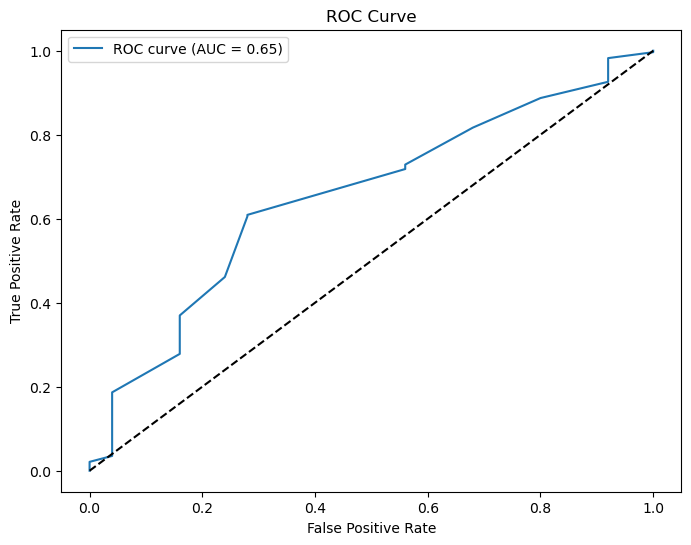

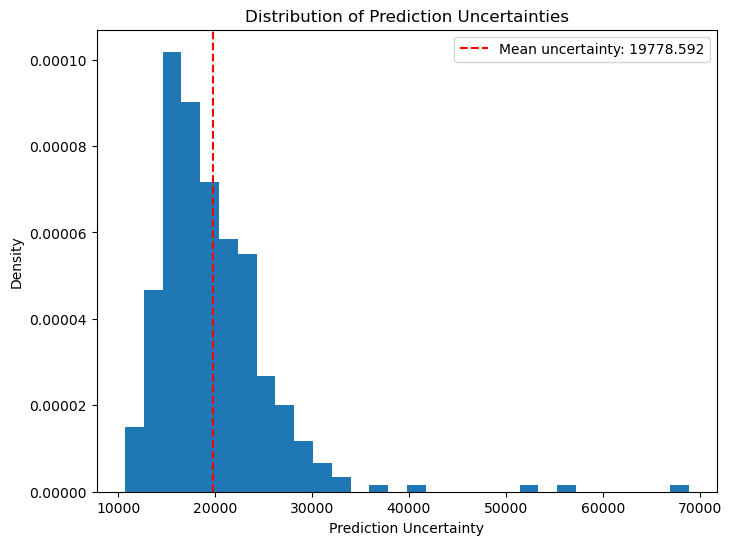

In [24]:
import torch
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the Bayesian Neural Network (BNN)
class BayesianNN(PyroModule):
    def __init__(self, input_dim, hidden_dim=64):
        super().__init__()
        # Define layers
        self.fc1 = PyroModule[torch.nn.Linear](input_dim, hidden_dim)
        self.fc2 = PyroModule[torch.nn.Linear](hidden_dim, hidden_dim)
        self.fc3 = PyroModule[torch.nn.Linear](hidden_dim, hidden_dim)
        self.out = PyroModule[torch.nn.Linear](hidden_dim, 1)
        
        # Initialize priors
        for layer in [self.fc1, self.fc2, self.fc3, self.out]:
            # Define priors for weights and biases
            layer.weight = PyroSample(dist.Normal(0., 1.).expand(layer.weight.shape).to_event(2))
            layer.bias = PyroSample(dist.Normal(0., 1.).expand(layer.bias.shape).to_event(1))

    def forward(self, x, y=None):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        logits = self.out(x).squeeze(-1)  # Logits before sigmoid
        
        # Perform sampling in a plate to handle batching
        with pyro.plate("data", x.shape[0]):
            if y is not None:
                pyro.sample("obs", dist.Bernoulli(logits=logits), obs=y)
        return logits  # Return logits, not probabilities


# Wrap the model and guide functions for use with SVI
def model(bnn, x_data, y_data=None):
    """Wrap the BayesianNN forward pass."""
    return bnn(x_data, y_data)

def guide(bnn, x_data, y_data=None):
    """Define the variational distribution."""
    for name, param in bnn.named_parameters():
        mean = pyro.param(f"{name}_mean", torch.zeros_like(param))
        scale = pyro.param(f"{name}_scale", torch.ones_like(param),
                           constraint=dist.constraints.positive)
        prior = dist.Normal(mean, scale)
        pyro.sample(name, prior)


# Training function
def train_bnn(bnn, train_loader, num_epochs=200, lr=0.01):
    """Train the Bayesian Neural Network."""
    pyro.clear_param_store()
    adam = pyro.optim.Adam({"lr": lr})
    elbo = pyro.infer.Trace_ELBO()
    svi = pyro.infer.SVI(lambda x, y: model(bnn, x, y),
                         lambda x, y: guide(bnn, x, y), 
                         adam, elbo)
    
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch_x, batch_y in train_loader:
            loss = svi.step(batch_x, batch_y)
            epoch_loss += loss
        
        losses.append(epoch_loss)
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")
    return losses


# Prediction function using Monte Carlo sampling
def predict_bnn(bnn, x_data, num_samples=100):
    """Make predictions using the Bayesian Neural Network."""
    predictive = pyro.infer.Predictive(lambda x, y=None: model(bnn, x, y),
                                       guide=bnn,
                                       num_samples=num_samples,
                                       return_sites=["obs", "_RETURN"])
    samples = predictive(x_data)
    
    # Extract logits and calculate probabilities
    logits = samples["_RETURN"]
    probs = torch.sigmoid(logits).mean(0).detach().numpy()  # Mean probability over Monte Carlo samples
    uncertainties = logits.std(0).detach().numpy()  # Uncertainty as std of logits
    predictions = (probs > 0.5).astype(int)  # Convert to binary predictions
    return predictions, probs, uncertainties


# Example training and prediction
# Assuming you have X_train, X_test, y_train, y_test available as numpy arrays

input_dim = X_train.shape[1]  # Input dimension from training data
bnn = BayesianNN(input_dim=input_dim)

# Prepare DataLoader
train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                         torch.tensor(y_train, dtype=torch.float32)),
                          batch_size=32, shuffle=True)

# Train the model
losses = train_bnn(bnn, train_loader, num_epochs=400)

# Make predictions
predictions_bnn, probabilities_bnn, uncertainties_bnn = predict_bnn(bnn, torch.tensor(X_test, dtype=torch.float32))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions_bnn))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, probabilities_bnn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot uncertainty distribution
plt.figure(figsize=(8, 6))
plt.hist(uncertainties_bnn, bins=30, density=True)
plt.axvline(uncertainties_bnn.mean(), color='r', linestyle='--', 
            label=f'Mean uncertainty: {uncertainties_bnn.mean():.3f}')
plt.xlabel('Prediction Uncertainty')
plt.ylabel('Density')
plt.title('Distribution of Prediction Uncertainties')
plt.legend()
plt.show()

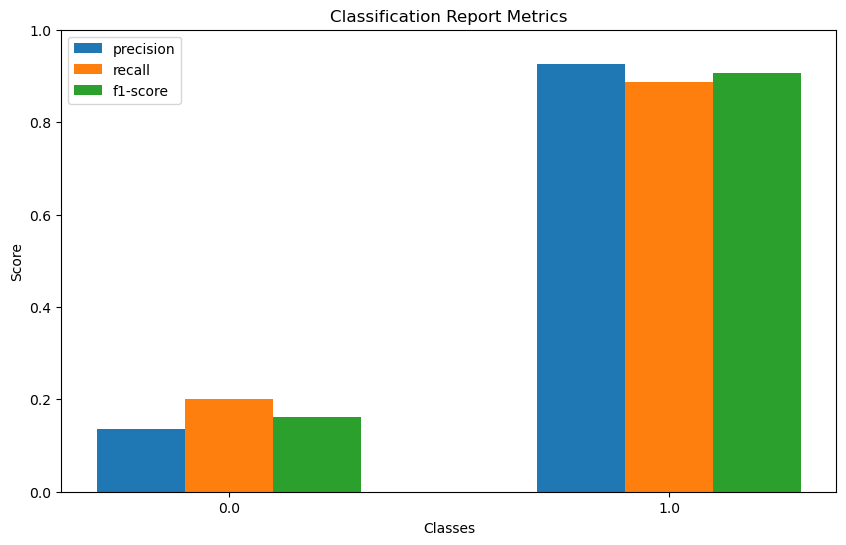

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_pred):
    # Generate the classification report as a dictionary
    report = classification_report(y_true, y_pred, output_dict=True)

    # Extract metrics
    metrics = ["precision", "recall", "f1-score"]
    classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    values = [[report[cls][metric] for cls in classes] for metric in metrics]

    # Plot
    x = np.arange(len(classes))
    width = 0.2  # Width of bars

    plt.figure(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i * width, values[i], width, label=metric)

    # Add details to the plot
    plt.xticks(x + width, classes)
    plt.xlabel("Classes")
    plt.ylabel("Score")
    plt.title("Classification Report Metrics")
    plt.legend()
    plt.ylim(0, 1)  # Metrics range from 0 to 1
    plt.show()

# Call this function with y_test and predictions
plot_classification_report(y_test, predictions_bnn)

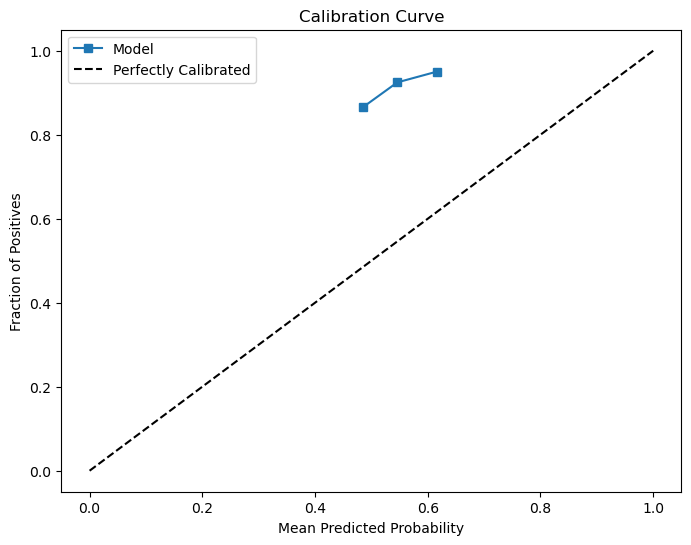

In [27]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plot_calibration_curve(y_true, y_probs):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_probs, n_bins=10)
    plt.figure(figsize=(8, 6))
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Model")
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve")
    plt.legend()
    plt.show()

# Call this function with y_test and probabilities
plot_calibration_curve(y_test, probabilities_bnn)

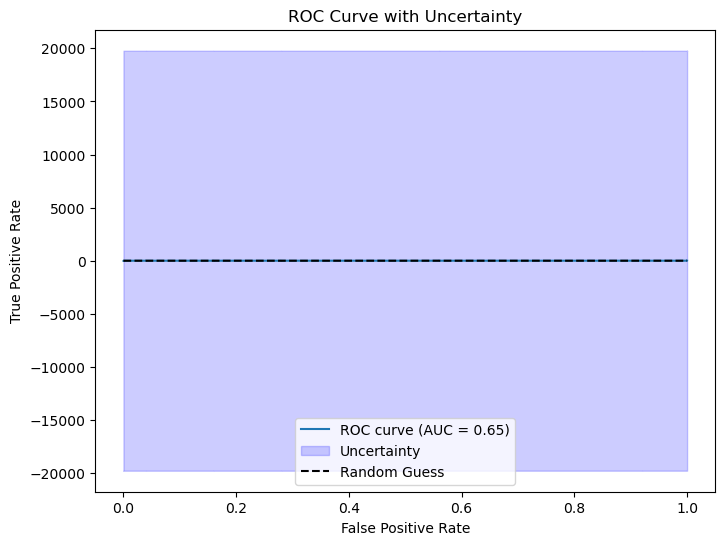

In [28]:
from sklearn.metrics import roc_curve, auc

def plot_roc_with_uncertainty(y_true, y_probs, uncertainties):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.fill_between(fpr, tpr - uncertainties.mean(), tpr + uncertainties.mean(),
                     color="blue", alpha=0.2, label="Uncertainty")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve with Uncertainty")
    plt.legend()
    plt.show()

# Call this function with y_test, probabilities, and uncertainties
plot_roc_with_uncertainty(y_test, probabilities_bnn, uncertainties_bnn)

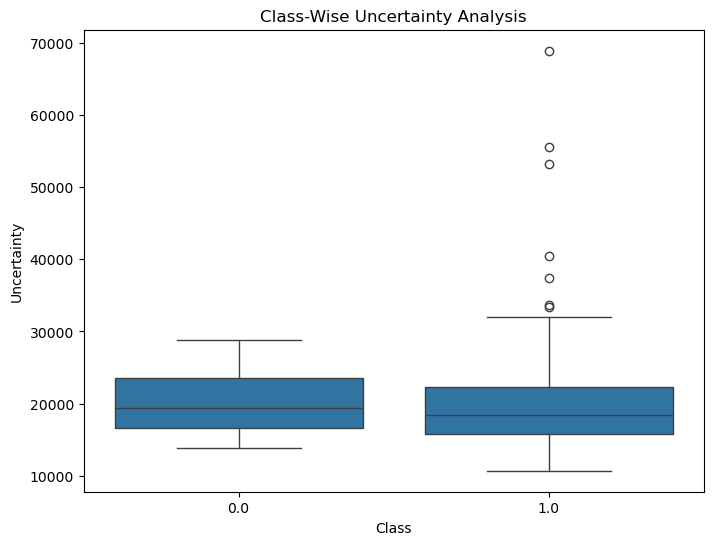

In [29]:
import pandas as pd
import seaborn as sns

def plot_classwise_uncertainty(y_true, uncertainties):
    data = pd.DataFrame({"True Class": y_true, "Uncertainty": uncertainties})
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="True Class", y="Uncertainty", data=data)
    plt.xlabel("Class")
    plt.ylabel("Uncertainty")
    plt.title("Class-Wise Uncertainty Analysis")
    plt.show()

# Call this function with y_test and uncertainties
plot_classwise_uncertainty(y_test, uncertainties_bnn)

# Implementing Monte-Carlo Dropout

Epoch 10, Loss: 2.5302
Epoch 20, Loss: 0.7607
Epoch 30, Loss: 1.4926
Epoch 40, Loss: 2.0692
Epoch 50, Loss: 1.8174
Epoch 60, Loss: 1.3254
Epoch 70, Loss: 0.2685
Epoch 80, Loss: 0.2875
Epoch 90, Loss: 0.1208
Epoch 100, Loss: 0.6272
Epoch 110, Loss: 0.2870
Epoch 120, Loss: 0.1168
Epoch 130, Loss: 0.4786
Epoch 140, Loss: 0.5548
Epoch 150, Loss: 0.4072
Epoch 160, Loss: 0.7995
Epoch 170, Loss: 0.4186
Epoch 180, Loss: 0.1915
Epoch 190, Loss: 1.7235
Epoch 200, Loss: 0.8256
Epoch 210, Loss: 0.3644
Epoch 220, Loss: 0.4626
Epoch 230, Loss: 0.2370
Epoch 240, Loss: 0.1360
Epoch 250, Loss: 1.0424
Epoch 260, Loss: 0.3562
Epoch 270, Loss: 1.5419
Epoch 280, Loss: 0.1170
Epoch 290, Loss: 0.9618
Epoch 300, Loss: 0.0913
Epoch 310, Loss: 0.4696
Epoch 320, Loss: 0.2593
Epoch 330, Loss: 4.5857
Epoch 340, Loss: 0.0415
Epoch 350, Loss: 0.2716
Epoch 360, Loss: 0.9455
Epoch 370, Loss: 0.0639
Epoch 380, Loss: 0.5589
Epoch 390, Loss: 0.0727
Epoch 400, Loss: 0.4395

Classification Report:
              precision  

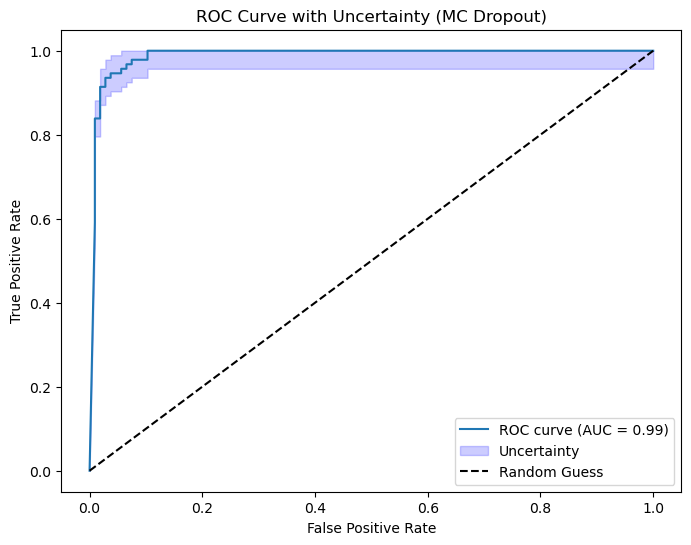

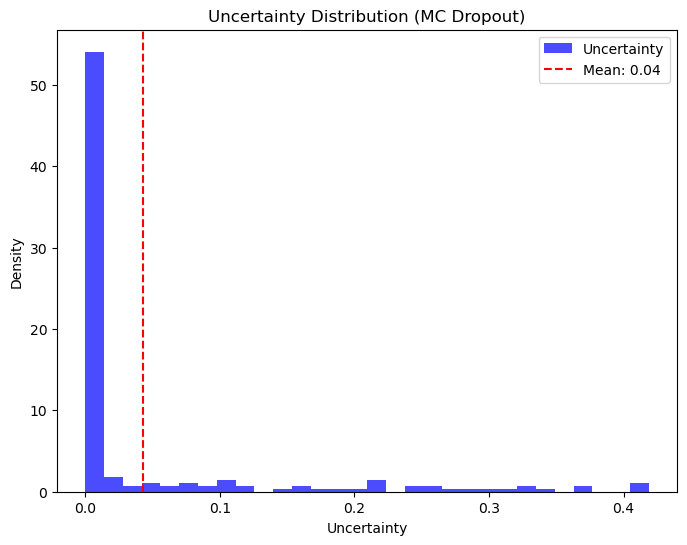

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define a Neural Network with Dropout for Classification
class MCDropoutNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=1):
        super(MCDropoutNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(p=0.2)  # Dropout probability

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Dropout active during training
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        if self.out.out_features == 1:  # Binary classification
            x = torch.sigmoid(self.out(x))
        else:  # Multi-class classification
            x = torch.softmax(self.out(x), dim=-1)
        return x

# Function to train the MC Dropout model
def train_mc_dropout(model, train_loader, num_epochs=100, lr=0.01):
    criterion = nn.BCELoss() if model.out.out_features == 1 else nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(x_batch).squeeze(-1)
            loss = criterion(outputs, y_batch.float() if model.out.out_features == 1 else y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# Function to predict using MC Dropout
def predict_mc_dropout(model, x_data, num_samples=100):
    model.train()  # Enable Dropout during inference
    predictions = torch.stack([model(x_data) for _ in range(num_samples)])
    mean_prediction = predictions.mean(0).detach().numpy()
    uncertainty = predictions.std(0).detach().numpy()
    return mean_prediction, uncertainty

# Plot ROC Curve with Uncertainty
def plot_roc_with_uncertainty(y_true, y_probs, uncertainties):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.fill_between(
        fpr, 
        np.clip(tpr - uncertainties.mean(), 0, 1), 
        np.clip(tpr + uncertainties.mean(), 0, 1),
        color="blue", alpha=0.2, label="Uncertainty"
    )
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve with Uncertainty (MC Dropout)")
    plt.legend()
    plt.show()


# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split dataset into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the MC Dropout model
input_dim = X.shape[1]
model = MCDropoutNN(input_dim)

# Train the model
train_mc_dropout(model, train_loader, num_epochs=400, lr=0.01)

# Predict with MC Dropout
mean_prediction_mc, uncertainty_mc = predict_mc_dropout(model, X_test, num_samples=100)

# For binary classification, threshold predictions at 0.5
predicted_classes = (mean_prediction_mc > 0.5).astype(int)

# Evaluate results
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

# Plot ROC Curve with Uncertainty
plot_roc_with_uncertainty(y_test, mean_prediction_mc, uncertainty_mc)

# Visualize uncertainty
plt.figure(figsize=(8, 6))
plt.hist(uncertainty_mc, bins=30, density=True, alpha=0.7, color="blue", label="Uncertainty")
plt.axvline(uncertainty_mc.mean(), color="red", linestyle="--", label=f"Mean: {uncertainty_mc.mean():.2f}")
plt.xlabel("Uncertainty")
plt.ylabel("Density")
plt.title("Uncertainty Distribution (MC Dropout)")
plt.legend()
plt.show()

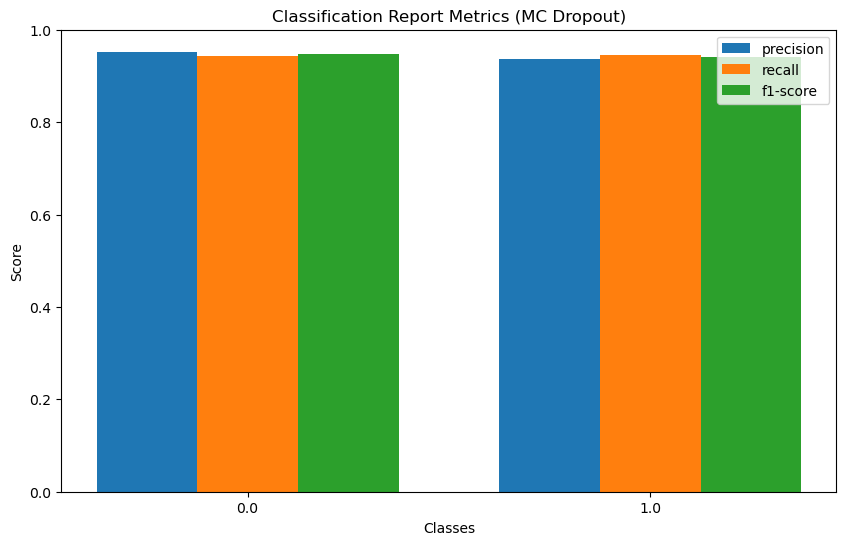

In [31]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def plot_classification_report_metrics(y_true, y_pred):
    """
    Plot precision, recall, and F1-score from a classification report.
    
    Args:
        y_true: Ground truth labels
        y_pred: Predicted labels
    """
    # Generate the classification report as a dictionary
    report = classification_report(y_true, y_pred, output_dict=True)

    # Extract metrics
    metrics = ["precision", "recall", "f1-score"]
    classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    values = [[report[cls][metric] for cls in classes] for metric in metrics]

    # Convert metrics to NumPy array for easy indexing
    values = np.array(values)

    # Plotting
    x = np.arange(len(classes))
    width = 0.25  # Width of the bars

    plt.figure(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i * width, values[i], width, label=metric)

    # Add labels, title, and legend
    plt.xticks(x + width, classes)
    plt.xlabel("Classes")
    plt.ylabel("Score")
    plt.ylim(0, 1)  # Metrics range from 0 to 1
    plt.title("Classification Report Metrics (MC Dropout)")
    plt.legend()
    plt.show()

# Call this function after generating predictions
plot_classification_report_metrics(y_test, predicted_classes)

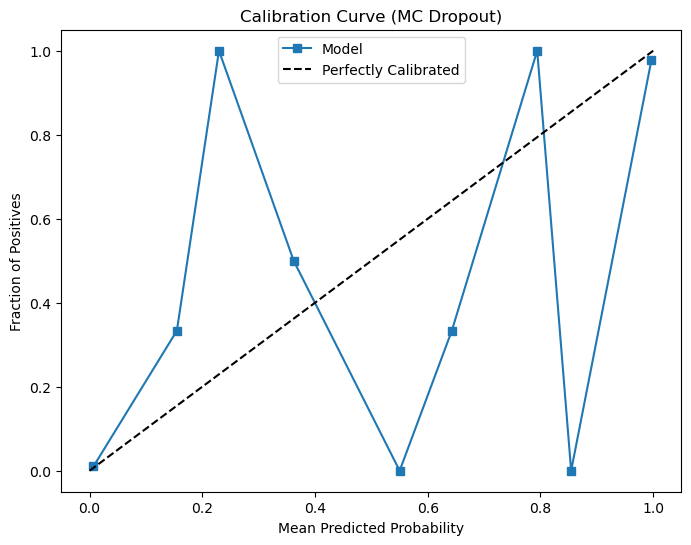

In [32]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plot_calibration_curve(y_true, y_probs, n_bins=10):
    """
    Plot the calibration curve to evaluate model probability calibration.
    
    Args:
        y_true: Ground truth binary labels.
        y_probs: Predicted probabilities for the positive class.
        n_bins: Number of bins to group predictions.
    """
    # Compute the calibration curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_probs, n_bins=n_bins)

    # Plot the calibration curve
    plt.figure(figsize=(8, 6))
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Model")
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve (MC Dropout)")
    plt.legend()
    plt.show()

# Call this function with true labels and predicted probabilities
plot_calibration_curve(y_test, mean_prediction_mc)

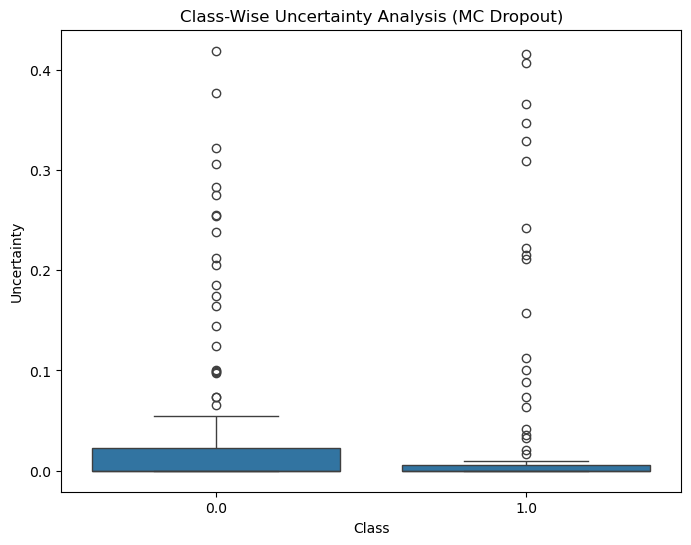

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_classwise_uncertainty(y_true, uncertainties):
    """
    Plot a boxplot of uncertainty values grouped by true class labels.

    Args:
        y_true: Ground truth binary class labels (0 or 1).
        uncertainties: Array of uncertainty values corresponding to predictions.
    """
    # Ensure inputs are 1D
    y_true = np.array(y_true).ravel()  # Flatten y_true to 1D
    uncertainties = np.array(uncertainties).ravel()  # Flatten uncertainties to 1D

    # Prepare data for plotting
    if len(y_true) != len(uncertainties):
        raise ValueError("y_true and uncertainties must have the same length.")
    
    data = pd.DataFrame({"True Class": y_true, "Uncertainty": uncertainties})
    
    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="True Class", y="Uncertainty", data=data)
    plt.xlabel("Class")
    plt.ylabel("Uncertainty")
    plt.title("Class-Wise Uncertainty Analysis (MC Dropout)")
    plt.show()

# Example Usage:
# Assuming y_test (true labels) and uncertainty_mc (uncertainty values) are available

# Call the function with ground truth and uncertainties
plot_classwise_uncertainty(y_test, uncertainty_mc)

In [34]:
print(f"y_test shape: {np.array(y_test).shape}")
print(f"uncertainty_mc shape: {np.array(uncertainty_mc).shape}")

y_test shape: (200,)
uncertainty_mc shape: (200, 1)


# Implementing Deep Ensemble

Training model 1/5
Epoch 10, Loss: 0.8893
Epoch 20, Loss: 0.0096
Epoch 30, Loss: 0.0033
Epoch 40, Loss: 0.0018
Epoch 50, Loss: 0.0011
Epoch 60, Loss: 0.0008
Epoch 70, Loss: 0.0005
Epoch 80, Loss: 0.0004
Epoch 90, Loss: 0.0003
Epoch 100, Loss: 0.0002
Epoch 110, Loss: 0.0002
Epoch 120, Loss: 0.0002
Epoch 130, Loss: 0.0001
Epoch 140, Loss: 0.0001
Epoch 150, Loss: 0.0001
Epoch 160, Loss: 0.0001
Epoch 170, Loss: 0.0001
Epoch 180, Loss: 0.0001
Epoch 190, Loss: 0.0000
Epoch 200, Loss: 0.0000
Epoch 210, Loss: 0.0000
Epoch 220, Loss: 0.0000
Epoch 230, Loss: 0.0000
Epoch 240, Loss: 0.0000
Epoch 250, Loss: 0.0000
Epoch 260, Loss: 0.0000
Epoch 270, Loss: 0.0000
Epoch 280, Loss: 0.0000
Epoch 290, Loss: 0.0000
Epoch 300, Loss: 0.0000
Epoch 310, Loss: 0.0000
Epoch 320, Loss: 0.0000
Epoch 330, Loss: 0.0000
Epoch 340, Loss: 0.0000
Epoch 350, Loss: 0.0000
Epoch 360, Loss: 0.0000
Epoch 370, Loss: 0.0000
Epoch 380, Loss: 0.0000
Epoch 390, Loss: 0.0000
Epoch 400, Loss: 0.0000
Training model 2/5
Epoch 10, L

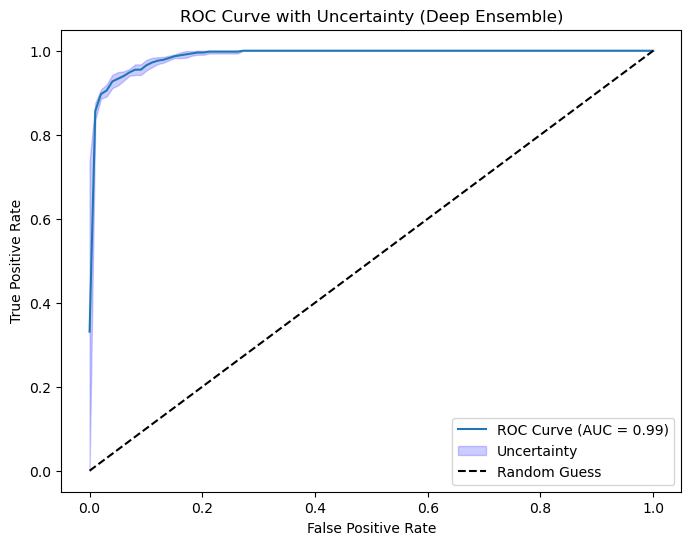

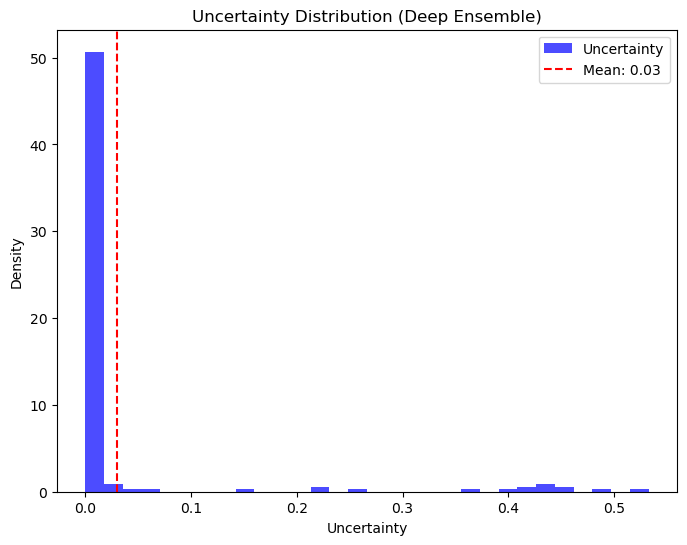

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))  # Sigmoid for binary classification
        return x

# Function to train a single model
def train_model(model, train_loader, num_epochs=100, lr=0.01):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(x_batch).squeeze(-1)  # Shape [batch_size]
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# Function to predict using an ensemble of models
def predict_ensemble(models, x_data):
    predictions = torch.stack([model(x_data).squeeze(-1) for model in models])  # Shape [ensemble_size, data_size]
    mean_prediction = predictions.mean(0).detach().numpy()  # Mean probability
    uncertainty = predictions.std(0).detach().numpy()  # Standard deviation as uncertainty
    return mean_prediction, uncertainty

# Create DataLoader for training
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize an ensemble of models
input_dim = X_train.shape[1]
ensemble_size = 5  # Number of models in the ensemble
models = [SimpleNN(input_dim) for _ in range(ensemble_size)]

# Train each model independently
for i, model in enumerate(models):
    print(f"Training model {i + 1}/{ensemble_size}")
    train_model(model, train_loader, num_epochs=400, lr=0.01)

# Predict with the ensemble
mean_prediction_ensemble, uncertainty_ensemble = predict_ensemble(models, X_test)

# Evaluate results
y_pred_classes = (mean_prediction_ensemble > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), y_pred_classes))

# ROC Curve and AUC with Uncertainty
fpr_list, tpr_list = [], []

# Generate FPR and TPR for each model in the ensemble
for model in models:
    predictions = model(X_test).squeeze(-1).detach().numpy()
    fpr, tpr, _ = roc_curve(y_test.numpy(), predictions)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Align FPR and calculate mean and std of TPRs
fpr_aligned = np.linspace(0, 1, 100)  # Fixed FPR range
tpr_aligned = np.array([np.interp(fpr_aligned, fpr_list[i], tpr_list[i]) for i in range(len(models))])
tpr_mean = tpr_aligned.mean(axis=0)
tpr_std = tpr_aligned.std(axis=0)

# Calculate mean AUC
roc_auc = auc(fpr_aligned, tpr_mean)

# Plot ROC Curve with Uncertainty
plt.figure(figsize=(8, 6))
plt.plot(fpr_aligned, tpr_mean, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.fill_between(
    fpr_aligned,
    np.clip(tpr_mean - tpr_std, 0, 1),
    np.clip(tpr_mean + tpr_std, 0, 1),
    color="blue",
    alpha=0.2,
    label="Uncertainty"
)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Uncertainty (Deep Ensemble)")
plt.legend()
plt.show()

# Plot Uncertainty Distribution
plt.figure(figsize=(8, 6))
plt.hist(uncertainty_ensemble, bins=30, alpha=0.7, color="blue", density=True, label="Uncertainty")
plt.axvline(uncertainty_ensemble.mean(), color="red", linestyle="--", label=f"Mean: {uncertainty_ensemble.mean():.2f}")
plt.xlabel("Uncertainty")
plt.ylabel("Density")
plt.title("Uncertainty Distribution (Deep Ensemble)")
plt.legend()
plt.show()

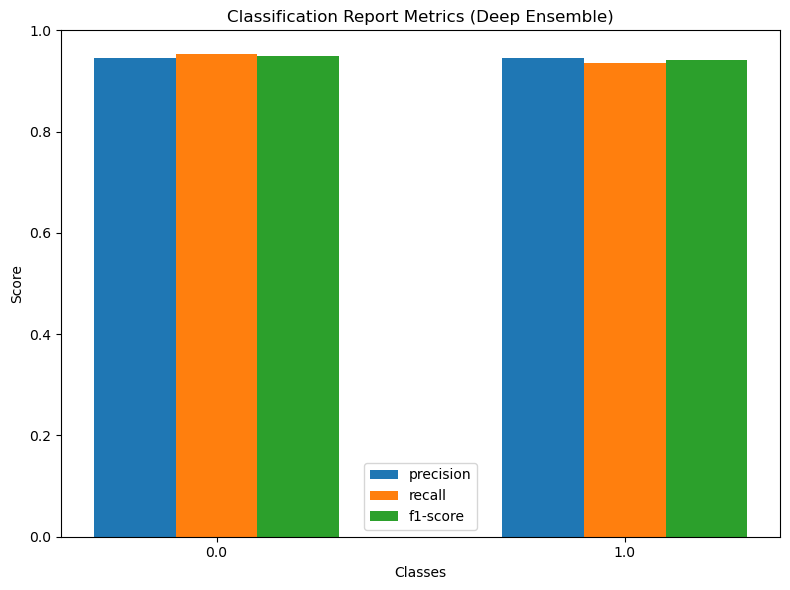

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have already calculated the classification report
# Replace with your deep ensemble's predictions and true labels
report = classification_report(y_test.numpy(), y_pred_classes, output_dict=True)

# Extract precision, recall, and f1-score for each class
classes = [str(cls) for cls in report.keys() if cls not in ["accuracy", "macro avg", "weighted avg"]]
precision = [report[cls]["precision"] for cls in classes]
recall = [report[cls]["recall"] for cls in classes]
f1_score = [report[cls]["f1-score"] for cls in classes]

# Set up bar plot positions and width
x = np.arange(len(classes))  # Class labels
width = 0.2  # Width of each bar

# Plot each metric as a grouped bar chart
plt.figure(figsize=(8, 6))
plt.bar(x - width, precision, width, label="precision")
plt.bar(x, recall, width, label="recall")
plt.bar(x + width, f1_score, width, label="f1-score")

# Add labels, title, and legend
plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Classification Report Metrics (Deep Ensemble)")
plt.xticks(x, classes)  # Set class labels on x-axis
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

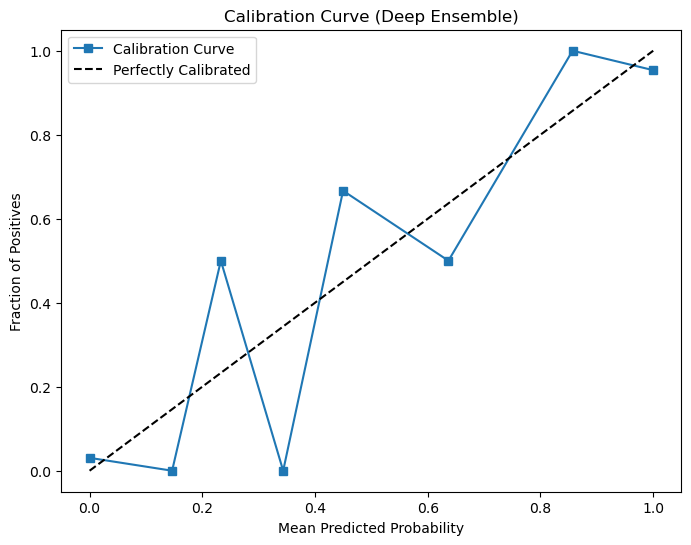

In [37]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plot_calibration_curve(y_true, y_prob, n_bins=10):
    """
    Plot a calibration curve to visualize how well predicted probabilities are calibrated.
    
    Args:
        y_true: Ground truth binary labels (0 or 1).
        y_prob: Predicted probabilities (mean predictions from the ensemble).
        n_bins: Number of bins to group predictions.
    """
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, strategy='uniform')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, "s-", label="Calibration Curve")
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve (Deep Ensemble)")
    plt.legend()
    plt.show()

# Example usage
plot_calibration_curve(y_test.numpy(), mean_prediction_ensemble)

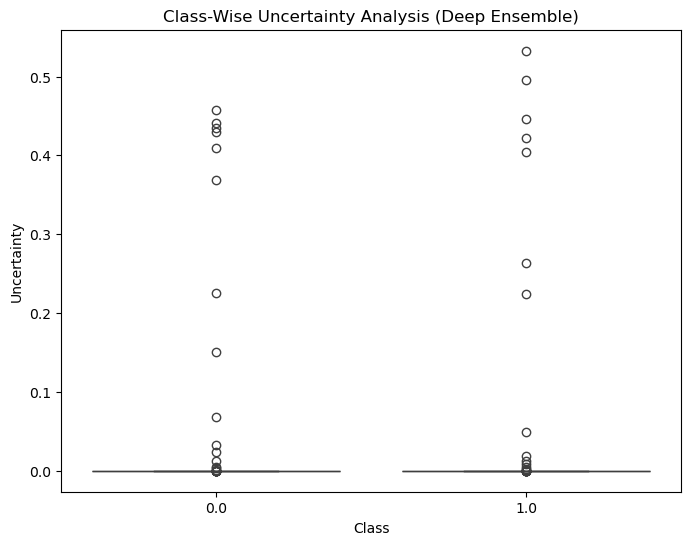

In [38]:
import pandas as pd
import seaborn as sns

def plot_classwise_uncertainty(y_true, uncertainties):
    """
    Plot a boxplot of uncertainty values grouped by true class labels.
    
    Args:
        y_true: Ground truth binary class labels (0 or 1).
        uncertainties: Array of uncertainty values corresponding to predictions.
    """
    # Prepare data for plotting
    data = pd.DataFrame({"True Class": y_true, "Uncertainty": uncertainties})
    
    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="True Class", y="Uncertainty", data=data)
    plt.xlabel("Class")
    plt.ylabel("Uncertainty")
    plt.title("Class-Wise Uncertainty Analysis (Deep Ensemble)")
    plt.show()

# Example usage
plot_classwise_uncertainty(y_test.numpy(), uncertainty_ensemble)

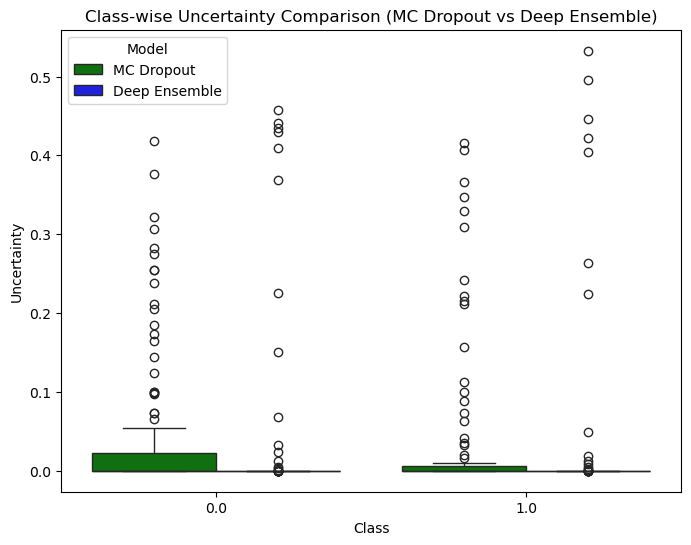

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_classwise_uncertainty_mc_vs_ensemble(y_true_mc, uncertainty_mc, y_true_ensemble, uncertainty_ensemble):
    # Ensure that all uncertainty arrays are 1D and of the same length as y_true
    if uncertainty_mc.ndim > 1:
        uncertainty_mc = uncertainty_mc.flatten()
    if uncertainty_ensemble.ndim > 1:
        uncertainty_ensemble = uncertainty_ensemble.flatten()

    # Make sure lengths match with y_true
    assert len(uncertainty_mc) == len(y_true_mc), f"Length mismatch: {len(uncertainty_mc)} vs {len(y_true_mc)}"
    assert len(uncertainty_ensemble) == len(y_true_ensemble), f"Length mismatch: {len(uncertainty_ensemble)} vs {len(y_true_ensemble)}"
    
    # Create DataFrames for MC Dropout and Deep Ensemble
    data_mc = pd.DataFrame({"True Class": y_true_mc, "Uncertainty": uncertainty_mc, "Model": "MC Dropout"})
    data_ensemble = pd.DataFrame({"True Class": y_true_ensemble, "Uncertainty": uncertainty_ensemble, "Model": "Deep Ensemble"})
    
    # Concatenate both models' data
    data = pd.concat([data_mc, data_ensemble], ignore_index=True)

    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Boxplot for comparing MC Dropout and Deep Ensemble uncertainties
    sns.boxplot(x="True Class", y="Uncertainty", hue="Model", data=data, palette={"MC Dropout": "green", "Deep Ensemble": "blue"})
    
    plt.xlabel("Class")
    plt.ylabel("Uncertainty")
    plt.title("Class-wise Uncertainty Comparison (MC Dropout vs Deep Ensemble)")
    plt.legend(title="Model")
    plt.show()
    
# Example call for comparing MC Dropout and Deep Ensemble uncertainties
plot_classwise_uncertainty_mc_vs_ensemble(y_test, uncertainty_mc, y_test, uncertainty_ensemble)